In [1]:
from tqst_class import *

[]


Number of qubits set to 2.
2
Diagonal counts are now set.
The threshold is now set to 0.2.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+
The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


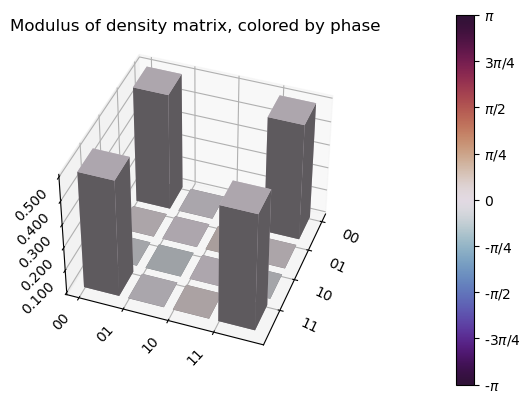

In [4]:
tomo = tQST(2)
nq = tomo.get_num_of_qubits()
print(nq)

diagonal = np.array([0.5, 0, 0, 0.5])
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

threshold = tomo.set_threshold(0.2)

##### FIRST WAY #####
offd_projs = tomo.get_projs_to_measure()
# print(np.shape(offd_projs))
# print(offd_projs)

offd_counts = [0.5, 0.25]
# counts = counts * 1e3

tomo.set_projs_and_counts(offd_projs, offd_counts)
projs, counts = tomo.get_projs_and_counts()
# print(np.shape(projs))
# print(projs)
# print(np.shape(counts))
# print(counts)
#####


##### SECOND WAY #####

# proj_to_meas = tomo.get_projectors_to_measure()

# tdict.setdefault('DD', 0.5)
# tdict.setdefault('DR', 0.25)

# #print(tdict)

# projs, counts = tomo.read_tomo_dictionary(tdict)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)

Number of qubits set to 3.
999
Diagonal counts are now set.
The threshold is now set to 0.1.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (1, 2, 'r')   |   |HRR>   |
|  (1, 2, 'i')   |   |HRD>   |
|  (1, 4, 'r')   |   |RHR>   |
|  (1, 4, 'i')   |   |RHD>   |
|  (2, 4, 'r')   |   |RRH>   |
|  (2, 4, 'i')   |   |RDH>   |
+----------------+-----------+
['HRR', 'HRD', 'RHR', 'RHD', 'RRH', 'RDH']
The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2] using Triangular model with 64 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


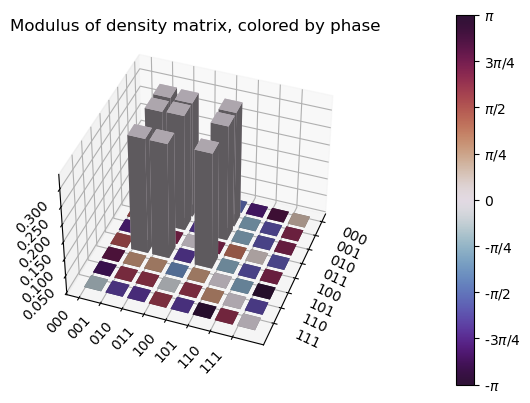

0.9982467474494888


In [11]:
tomo = tQST(3)
nq = tomo.get_num_of_qubits()

diagonal = [0, 333, 333, 0, 333, 0, 0, 0]
N = np.sum(diagonal)
print(N)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

threshold = 0.1
tomo.set_threshold(threshold)

proj_to_meas = tomo.get_projectors_to_measure()
print(proj_to_meas)


# tdict.setdefault('HHH', 0)
# tdict.setdefault('HHV', 333)
# tdict.setdefault('HVH', 333)
# tdict.setdefault('HVV', 0)
# tdict.setdefault('VHH', 333)
# tdict.setdefault('VHV', 0)
# tdict.setdefault('VVH', 0)
# tdict.setdefault('VVV', 0)
tdict.setdefault('HRR', 333/N)
tdict.setdefault('HRD', 167/N)
tdict.setdefault('RHR', 333/N)
tdict.setdefault('RHD', 167/N)
tdict.setdefault('RRH', 333/N)
tdict.setdefault('RDH', 167/N)

projs, counts = tomo.read_tomo_dictionary(tdict)

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)
dmt.plot_density_matrix_3D(rho_rec)

rho_target = dmt.density_matrix_W(3)

F = dmt.fidelity(rho_rec, rho_target)

print(F)